<a href="https://colab.research.google.com/github/ClaudiaTurner/GEOG5990M_Project/blob/main/Final_Project_Python_GEOG5990M.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5990M Final Assignment (Template)

Student ID number: 201893759

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read in required packages

This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

**PACKAGE IMPORTS & DATA LOADING**

In [41]:
# To begin, I will import the packages I will use in block 1. These include:

import pandas as pd                          # Used for uploading and handling data (e.g., upload CSV) (Nelli, 2023).

import matplotlib.pyplot as plt              # Used for creating visualisations (e.g., line chart) (Walker, 2020).

import numpy as np                           # Used for numerical operations (e.g., create a range of years) (Walker, 2020).

import seaborn as sns                        # Makes it easier to create attractive and informative statistical graphics (e.g., barplot) (Rajagopalan,2021)

from matplotlib import colormaps             # Modern import for colorblind-safe colormaps

from matplotlib.ticker import FuncFormatter  #  Needed for formatting axis ticks

In [ ]:
# The DataFrame we will use contains information on number of house sales from 1996 to 2023, across all districts in England. Our analysis will cover 2000 to 2023.
# To upload the data (CSV), I’ll paste the GitHub file path below:
Sales_England=pd.read_csv('https://github.com/ClaudiaTurner/GEOG5990M_Project/raw/main/Data_Assignment_2/Eng_sales_1995_2025_Exp.csv')


# To understand the data better, I'll take a quick look at the first six rows
display(Sales_England.head(6))

# I added row and column info below the table, with a title and a line break for clarity.
print('\nNumber of rows and columns:')
print(Sales_England.shape)


,Residential property sales,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30
0,ONS Crown Copyright Reserved [from Nomis on 8 ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Count of sales:,Sales,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,row,Sep-96,Sep-97,Sep-98,Sep-99,Sep-00,Sep-01,Sep-02,Sep-03,Sep-04,...,Sep-16,Sep-17,Sep-18,Sep-19,Sep-20,Sep-21,Sep-22,Sep-23,Area,mnemonic
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,850013,1047268,1016037,1084672,1130983,1133620,1271168,1153345,1264229,...,903005,852771,829715,803012,669410,1081660,787290,573646,country:England,E92000001



Number of rows and columns:
(334, 31)


**DATA CLEANING**

In [ ]:
# The original CSV had extra information in rows 1, 2, 3, and 4, making the data messy.
# For example, 'Unnamed: 1' was just a blank row in the original file.
# The column titles should be in the fifth row e.g.: like 'Sep-96', 'Area', etc.

## To clean the data, I will start by removing the first four rows using the 'skiprows' function (Walker, 2020).
## This will eliminate everything above the actual headers.
Sales_England = pd.read_csv('https://github.com/ClaudiaTurner/GEOG5990M/raw/main/Sales_1995_2023_England_Districts_exp.csv', skiprows=4)

# Confirm the changes by displaying the first five rows.
print('\n ATTRIBUTE TABLE:') # Add title
display(Sales_England.head())

# Additionally, verify that numerical columns are of the correct type (e.g., float or integer).
print('\n DATA TYPES:') # Add title
print(Sales_England.dtypes)


 ATTRIBUTE TABLE:


,row,Sep-96,Sep-97,Sep-98,Sep-99,Sep-00,Sep-01,Sep-02,Sep-03,Sep-04,...,Sep-16,Sep-17,Sep-18,Sep-19,Sep-20,Sep-21,Sep-22,Sep-23,Area,mnemonic
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,850013.0,1047268.0,1016037.0,1084672.0,1130983.0,1133620.0,1271168.0,1153345.0,1264229.0,...,903005.0,852771.0,829715.0,803012.0,669410.0,1081660.0,787290.0,573646.0,country:England,E92000001
2,2.0,1159.0,1390.0,1405.0,1440.0,1726.0,2140.0,2359.0,2488.0,2979.0,...,1273.0,1209.0,1304.0,1235.0,1050.0,1729.0,1490.0,1103.0,ladu2023:Hartlepool,E06000001
3,3.0,1776.0,1934.0,1948.0,2055.0,2280.0,2462.0,2826.0,3016.0,3339.0,...,1822.0,1749.0,1819.0,1828.0,1528.0,2316.0,2035.0,1298.0,ladu2023:Middlesbrough,E06000002
4,4.0,1879.0,2000.0,1957.0,1986.0,2266.0,2582.0,3497.0,3390.0,3138.0,...,1824.0,1947.0,2007.0,1967.0,1636.0,2539.0,2081.0,1667.0,ladu2023:Redcar and Cleveland,E06000003



 DATA TYPES:
row         float64
Sep-96      float64
Sep-97      float64
Sep-98      float64
Sep-99      float64
Sep-00      float64
Sep-01      float64
Sep-02      float64
Sep-03      float64
Sep-04      float64
Sep-05      float64
Sep-06      float64
Sep-07      float64
Sep-08      float64
Sep-09      float64
Sep-10      float64
Sep-11      float64
Sep-12      float64
Sep-13      float64
Sep-14      float64
Sep-15      float64
Sep-16      float64
Sep-17      float64
Sep-18      float64
Sep-19      float64
Sep-20      float64
Sep-21      float64
Sep-22      float64
Sep-23      float64
Area         object
mnemonic     object
dtype: object


In [ ]:
# Our analysis should include years (2000 - 2023), hence we can eliminate the rest of the years
# Additionally, we also eliminate 'row' because we already have the table's row enumeration
Sales_England = Sales_England.drop(columns=[
    'row', 'Sep-96', 'Sep-97', 'Sep-98', 'Sep-99',])

# After eliminating many columns, ill check if the columns were successfully eliminated
Sales_England.columns.tolist()   # .tolist() converts the column index into a regular Python list

['Sep-00',
 'Sep-01',
 'Sep-02',
 'Sep-03',
 'Sep-04',
 'Sep-05',
 'Sep-06',
 'Sep-07',
 'Sep-08',
 'Sep-09',
 'Sep-10',
 'Sep-11',
 'Sep-12',
 'Sep-13',
 'Sep-14',
 'Sep-15',
 'Sep-16',
 'Sep-17',
 'Sep-18',
 'Sep-19',
 'Sep-20',
 'Sep-21',
 'Sep-22',
 'Sep-23',
 'Area',
 'mnemonic']

In [ ]:
# RENAME COLUMNS

#To further clean and enhance the data, I'll rename and reorder the columns.
# I'll also change the date format from 'Sep-13' to '2013' for all years to improve readability. # To update the file, I can use either 'Sales_England =' or set 'inplace=True'.

Sales_England = Sales_England.rename(columns={
  'Sep-00':'2000','Sep-01':'2001', 'Sep-02':'2002', 'Sep-03':'2003', 'Sep-04':'2004',
    'Sep-05':'2005', 'Sep-06':'2006', 'Sep-07':'2007', 'Sep-08':'2008', 'Sep-09':'2009',
    'Sep-10':'2010', 'Sep-11':'2011', 'Sep-12':'2012','Sep-13': '2013', 'Sep-14': '2014', 'Sep-15': '2015', 'Sep-16': '2016', 'Sep-17': '2017',
    'Sep-18': '2018','Sep-19': '2019','Sep-20': '2020','Sep-21': '2021','Sep-22': '2022','Sep-23': '2023','Area': 'DISTRICT','mnemonic': 'CODE_LAD'})

#REORDER COLUMNS

# 2. Reorder the columns so that the district name and code appear before the years.
# After runing this code: 'Sales_England = Sales_England[['DISTRICT', 'CODE_LAD'] + [str(y) for y in range(2000, 2023)]]', year 2023 disappeared
## Thus I asked Copilot (ADD VERSION): 'After introducing the code, year 2023 is not visible, why?'
## Copilot:  in Python, range(...) excludes the end value, so 2023 is not included.

Sales_England = Sales_England[['DISTRICT', 'CODE_LAD'] + [str(y) for y in range(2000, 2024)]]

# Verify final column names and order; .T transposes the DataFrame to display columns vertically for easier viewing.
Sales_England.tail().T


,315,316,317,318,319
DISTRICT,ladu2023:Torfaen,ladu2023:Monmouthshire,ladu2023:Newport,ladu2023:Powys,ladu2023:Merthyr Tydfil
CODE_LAD,W06000020,W06000021,W06000022,W06000023,W06000024
2000,1461.0,2038.0,2856.0,2048.0,762.0
2001,1438.0,1867.0,2935.0,2094.0,779.0
2002,1612.0,2038.0,3464.0,2101.0,1000.0
2003,1511.0,1696.0,3003.0,2179.0,1016.0
2004,1482.0,2082.0,3101.0,2341.0,1061.0
2005,1079.0,1433.0,2396.0,1734.0,840.0
2006,1488.0,1543.0,2938.0,2066.0,977.0
2007,1695.0,1739.0,2757.0,2279.0,1006.0


In [ ]:
# Search for null values and delete them to enhance clarity

#Search for null values
# Explain why we have null values
Sales_England.isnull().sum()

,0
DISTRICT,1
CODE_LAD,1
2000,1
2001,1
2002,1
2003,1
2004,1
2005,1
2006,1
2007,1


In [ ]:
# Eliminate null values.............. Why do you eliminate them?
Sales_England = Sales_England.dropna()

# .info() shows column names, data types, non-null counts, and memory usage (Walker, 2020.
Sales_England.head(3)

,DISTRICT,CODE_LAD,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
1,country:England,E92000001,1130983.0,1133620.0,1271168.0,1153345.0,1264229.0,976245.0,1203858.0,1279204.0,...,877425.0,854379.0,903005.0,852771.0,829715.0,803012.0,669410.0,1081660.0,787290.0,573646.0
2,ladu2023:Hartlepool,E06000001,1726.0,2140.0,2359.0,2488.0,2979.0,2123.0,2285.0,2290.0,...,1113.0,1205.0,1273.0,1209.0,1304.0,1235.0,1050.0,1729.0,1490.0,1103.0
3,ladu2023:Middlesbrough,E06000002,2280.0,2462.0,2826.0,3016.0,3339.0,2817.0,3139.0,3514.0,...,1556.0,1748.0,1822.0,1749.0,1819.0,1828.0,1528.0,2316.0,2035.0,1298.0


In [ ]:
# ELIMINATE A ROW: We're removing the first row (country:England) because the data is unclear and not useful for our analysis.

# Drop the first row (Country: England) by specifying its index.
# Later on, we'll create a new row to calculate the total amount per year. index[0] selects the first row in the table.

Sales_England = Sales_England.drop(Sales_England.index[0]).reset_index(drop=True) # .reset_index(drop=True) resets row numbering to start at 0
                                                                                  # e.g., instead of index 1, 2, 3... → becomes 0, 1, 2...

# The first row has now been removed. Check the first 3 rows to confirm.
Sales_England.head(3)


,DISTRICT,CODE_LAD,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,ladu2023:Hartlepool,E06000001,1726.0,2140.0,2359.0,2488.0,2979.0,2123.0,2285.0,2290.0,...,1113.0,1205.0,1273.0,1209.0,1304.0,1235.0,1050.0,1729.0,1490.0,1103.0
1,ladu2023:Middlesbrough,E06000002,2280.0,2462.0,2826.0,3016.0,3339.0,2817.0,3139.0,3514.0,...,1556.0,1748.0,1822.0,1749.0,1819.0,1828.0,1528.0,2316.0,2035.0,1298.0
2,ladu2023:Redcar and Cleveland,E06000003,2266.0,2582.0,3497.0,3390.0,3138.0,2406.0,2945.0,3376.0,...,1918.0,1773.0,1824.0,1947.0,2007.0,1967.0,1636.0,2539.0,2081.0,1667.0


In [ ]:
# MODIFY ROW NAMES IN THE 'DISTRICT' COLUMN:  I'll remove the 'ladu2023:' prefix from all values in the 'DISTRICT' column to clean up the names.
# This will improve readability and make it easier to select districts later on.

Sales_England['DISTRICT'] = Sales_England['DISTRICT'].str.replace('ladu2023:', '')

# The prefix in the district names is no longer visible. Briefly check the first 5 rowa
Sales_England.head()

,DISTRICT,CODE_LAD,2000,2001,2002,2003,2004,2005,2006,2007,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Hartlepool,E06000001,1726.0,2140.0,2359.0,2488.0,2979.0,2123.0,2285.0,2290.0,...,1113.0,1205.0,1273.0,1209.0,1304.0,1235.0,1050.0,1729.0,1490.0,1103.0
1,Middlesbrough,E06000002,2280.0,2462.0,2826.0,3016.0,3339.0,2817.0,3139.0,3514.0,...,1556.0,1748.0,1822.0,1749.0,1819.0,1828.0,1528.0,2316.0,2035.0,1298.0
2,Redcar and Cleveland,E06000003,2266.0,2582.0,3497.0,3390.0,3138.0,2406.0,2945.0,3376.0,...,1918.0,1773.0,1824.0,1947.0,2007.0,1967.0,1636.0,2539.0,2081.0,1667.0
3,Stockton-on-Tees,E06000004,3978.0,4168.0,5320.0,4610.0,4471.0,3293.0,4341.0,4901.0,...,2724.0,2685.0,2922.0,2959.0,3090.0,3066.0,2523.0,3826.0,3063.0,2186.0
4,Darlington,E06000005,2538.0,2770.0,3033.0,2926.0,3288.0,2287.0,2771.0,3033.0,...,1589.0,1705.0,1679.0,1642.0,1602.0,1616.0,1501.0,2435.0,1885.0,1339.0


**NEW VARIABLES: DATA EXPLORATION & VISUALISATION**

In [ ]:
# CALCULATE TOTAL SALES PER DISTRICT (2000–2023) TO IDENTIFY DISTRICTS WITH THE MOST AND LEAST SALES

# 1. Identify year columns by selecting only numerical columns (type float64),
# which correspond to annual sales data. This excludes non-numerical metadata columns
# like 'DISTRICT' and 'CODE_LAD' automatically.

year_columns = Sales_England.select_dtypes(include='number').columns

# 2. Sum across the selected year columns (per row) to calculate the total number of sales
# for each district (LAD) across all years.
# axis=1 means the operation is performed **horizontally across columns** (i.e., across years for each row).

Sales_England['TOTAL_SALES_LAD'] = Sales_England[year_columns].sum(axis=1)

Sales_England.head(4)

,DISTRICT,CODE_LAD,2000,2001,2002,2003,2004,2005,2006,2007,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,TOTAL_SALES_LAD
0,Hartlepool,E06000001,1726.0,2140.0,2359.0,2488.0,2979.0,2123.0,2285.0,2290.0,...,1205.0,1273.0,1209.0,1304.0,1235.0,1050.0,1729.0,1490.0,1103.0,36918.0
1,Middlesbrough,E06000002,2280.0,2462.0,2826.0,3016.0,3339.0,2817.0,3139.0,3514.0,...,1748.0,1822.0,1749.0,1819.0,1828.0,1528.0,2316.0,2035.0,1298.0,49516.0
2,Redcar and Cleveland,E06000003,2266.0,2582.0,3497.0,3390.0,3138.0,2406.0,2945.0,3376.0,...,1773.0,1824.0,1947.0,2007.0,1967.0,1636.0,2539.0,2081.0,1667.0,51496.0
3,Stockton-on-Tees,E06000004,3978.0,4168.0,5320.0,4610.0,4471.0,3293.0,4341.0,4901.0,...,2685.0,2922.0,2959.0,3090.0,3066.0,2523.0,3826.0,3063.0,2186.0,78308.0


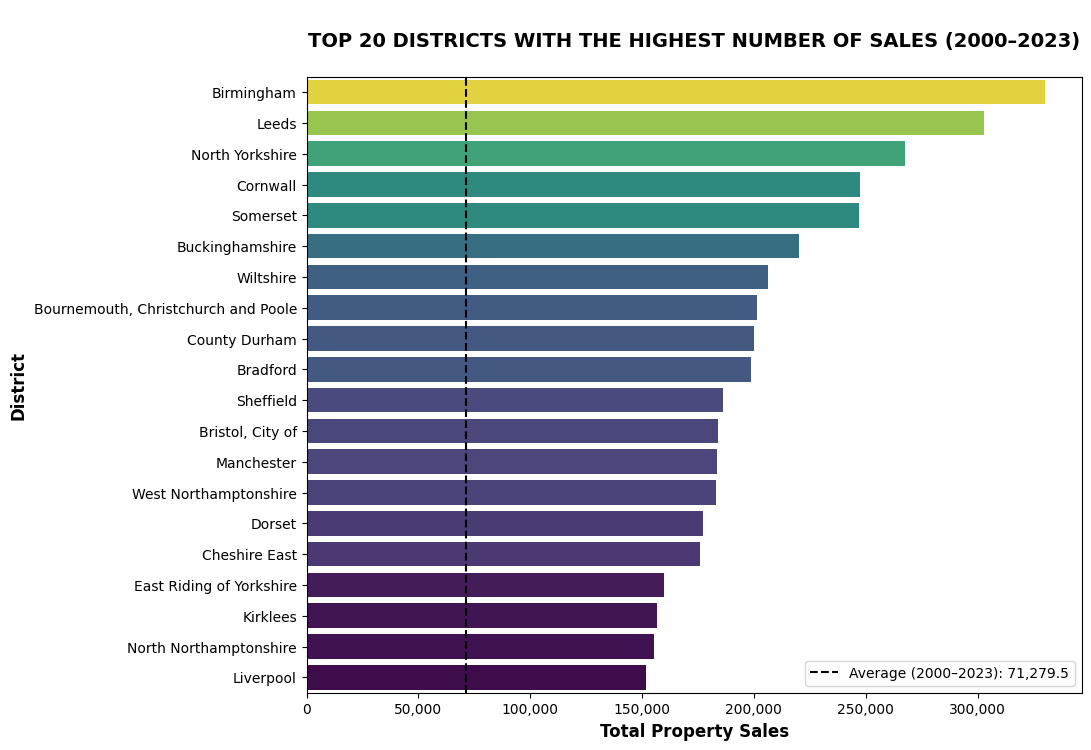

In [ ]:
# NON-SPATIAL DATA VISUALISATION:
# This visualisation aims to inform the public and stakeholders about
# the number of houses sold per district, along with the national average.

# NON-SPATIAL DATA VISUALISATION:
# This visualisation aims to inform the public and stakeholders about
# the number of houses sold per district, along with the national average.

# 1. Sort by total sales and get top 20 districts
top_avg_districts = Sales_England.sort_values('TOTAL_SALES_LAD', ascending=False).head(20)                           # Get top 20 LADs by total sales

# 2. Create a colorblind-friendly gradient using 'viridis'
norm = plt.Normalize(top_avg_districts['TOTAL_SALES_LAD'].min(), top_avg_districts['TOTAL_SALES_LAD'].max())          # Normalize values for color scale
cmap = colormaps['viridis']                                                                                           # Choose a perceptually uniform, colorblind-safe colormap
colors = [cmap(norm(val)) for val in top_avg_districts['TOTAL_SALES_LAD']]                                            # Map each district's total sales to a color


# 3. Calculate the national average (across ALL districts)
avg_sales = Sales_England['TOTAL_SALES_LAD'].mean()



## I asked Copilot: This message is appearing above my graph. How can I remove it?
## <ipython-input-15-96b6affc0073>:24: FutureWarning:
## Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.
## sns.barplot(x='TOTAL_SALES_LAD', y='DISTRICT', data=top_avg_districts, palette=colors)
plt.figure(figsize=(10, 8))
sns.barplot( x='TOTAL_SALES_LAD', y='DISTRICT', data=top_avg_districts,
             hue='DISTRICT',      # explicitly define hue
             palette=colors,      # use your existing color gradient
             legend=False)        # suppress the legend display




# 5. Add a vertical line to show the national average
plt.axvline(avg_sales, color='black', linestyle='--', linewidth=1.5, label=f"Average (2000–2023): {avg_sales:,.1f}")  # Add average line


# 6. Customize labels and legend
plt.title("\nTOP 20 DISTRICTS WITH THE HIGHEST NUMBER OF SALES (2000–2023)\n", fontsize=14, fontweight='bold')
plt.xlabel("Total Property Sales", fontsize=12, fontweight='bold')
plt.ylabel("District", fontsize=12, fontweight='bold')
plt.legend(loc='lower right')

# 7. Format X-axis to show commas in numbers (e.g., 50,000)
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

plt.show()

In [ ]:
# IDENTIFYING THE YEAR WITH THE HIGHEST NUMBER OF PROPERTY SALES PER DISTRICT

# 1. Create a new column 'MOST_COMMON_YEARS' that stores the year in which each district
#    recorded its highest number of property sales (between 2000 and 2023).

Sales_England['MOST_COMMON_YEARS']=Sales_England[['2000','2001', '2002', '2003', '2004', '2005', '2006', '2007',
                                                  '2008', '2009', '2010', '2011','2012', '2013', '2014', '2015',
                                                  '2016', '2017', '2018', '2019', '2020', '2021', '2022',
                                                  '2023']].idxmax(axis=1) # '.idxmax(axis=1)' returns the column label (i.e., the year) where the row (district) had its maximum value.


# 2. Count how many districts had their peak sales in each year.
#    This gives an overview of which years were the most active across England.

Sales_England['MOST_COMMON_YEARS'].value_counts()


,count
MOST_COMMON_YEARS,
2002,102
2007,93
2004,50
2021,47
2000,11
2006,9
2003,4
2001,1
2016,1


In [ ]:
# CALCULATE AVERAGE number of properties sold per district per year between 2000 and 2023.
# This helps to understand typical annual market activity for each district  (Few, 2012).

# 1. Dynamically find all year columns between 2000 and 2023.
# This avoids hardcoding and ensures the list only includes numeric year labels.
year_cols = [col for col in Sales_England.columns if col.isdigit() and 2000 <= int(col) <= 2023]

# 2. Calculate the row-wise average across those year columns (i.e., for each district)
# axis=1 means we're averaging values horizontally, across the years for each district.
Sales_England['AVERAGE'] = Sales_England[year_cols].mean(axis=1)

# 3. Round the average to 1 decimal place for easier readability
Sales_England['AVERAGE'] = Sales_England['AVERAGE'].round(0)

# 4. Preview the result
Sales_England.head(4)


# QUICK SALES OVERVIEW: Display top and bottom 20 districts by total property sales (2000–2023)

# 🔺 Top 20 districts with the highest number of sales
print("\n🔺 Top 20 Districts by Total Property Sales:\n")
print(Sales_England.nlargest(20, 'AVERAGE')[['DISTRICT', 'AVERAGE']])   # Select top 20 by total sales

# Bottom 20 districts by total property sales
print("\n🔻 Bottom 20 Districts by Total Property Sales\n") # Note for interpretation
print(Sales_England.nsmallest(20, 'AVERAGE')[['DISTRICT', 'AVERAGE']])  # Select bottom 20 by total sales



🔺 Top 20 Districts by Total Property Sales:

                                DISTRICT  AVERAGE
120                           Birmingham  13752.0
60                                 Leeds  12628.0
52                       North Yorkshire  11143.0
276                             Cornwall  10310.0
295                             Somerset  10285.0
217                      Buckinghamshire   9167.0
278                            Wiltshire   8590.0
279  Bournemouth, Christchurch and Poole   8381.0
5                          County Durham   8326.0
57                              Bradford   8284.0
56                             Sheffield   7756.0
270                     Bristol, City of   7666.0
34                            Manchester   7648.0
67                 West Northamptonshire   7633.0
280                               Dorset   7392.0
16                         Cheshire East   7327.0
48              East Riding of Yorkshire   6651.0
59                              Kirklees   6522.0
66  

In [ ]:
# NEW ROW: TOTAL SALES AMOUNT PER YEAR IN ENGLAND

# This section adds a new row that sums the total property sales across all districts,
# for each year and for the entire dataset. The row will help visualize or compare
# national-level trends vs. individual districts.

# 1. Identify which columns are numeric (i.e., actual sales figures for each year),
# and which are non-numeric (e.g., 'DISTRICT', 'CODE_LAD', etc.)
numeric_cols = Sales_England.select_dtypes(include='number').columns
non_numeric_cols = [col for col in Sales_England.columns if col not in numeric_cols]

# 2. Sum all sales data across numeric columns (i.e., total number of properties sold per year)
england_totals = Sales_England[numeric_cols].sum()

# 3. For the non-numeric fields like 'DISTRICT' or 'CODE_LAD',
# insert a clear label so we can identify this row as a total (not a real district)
for col in non_numeric_cols:
    england_totals[col] = 'ENGLAND_TOTAL_SALES'

# 4. Reorder the new row to match the same column order as the original DataFrame
england_totals = england_totals[Sales_England.columns]

# 5. Append this total row to the original DataFrame
Sales_England = pd.concat([Sales_England, pd.DataFrame([england_totals])], ignore_index=True)

# 6. Optional: display last few rows to verify that the new row has been added
Sales_England.tail()


,DISTRICT,CODE_LAD,2000,2001,2002,2003,2004,2005,2006,2007,...,2017,2018,2019,2020,2021,2022,2023,TOTAL_SALES_LAD,MOST_COMMON_YEARS,AVERAGE
314,Monmouthshire,W06000021,2038.0,1867.0,2038.0,1696.0,2082.0,1433.0,1543.0,1739.0,...,1557.0,1482.0,1307.0,1054.0,1936.0,1556.0,1030.0,35065.0,2004,1461.0
315,Newport,W06000022,2856.0,2935.0,3464.0,3003.0,3101.0,2396.0,2938.0,2757.0,...,3021.0,2869.0,2503.0,1798.0,2634.0,2440.0,1763.0,55795.0,2002,2325.0
316,Powys,W06000023,2048.0,2094.0,2101.0,2179.0,2341.0,1734.0,2066.0,2279.0,...,1827.0,1880.0,1802.0,1383.0,2394.0,1831.0,1284.0,41923.0,2021,1747.0
317,Merthyr Tydfil,W06000024,762.0,779.0,1000.0,1016.0,1061.0,840.0,977.0,1006.0,...,745.0,682.0,725.0,577.0,818.0,781.0,527.0,17607.0,2004,734.0
318,ENGLAND_TOTAL_SALES,ENGLAND_TOTAL_SALES,1185922.0,1190392.0,1338117.0,1216187.0,1328075.0,1022613.0,1260377.0,1340853.0,...,899937.0,877152.0,849682.0,704696.0,1135971.0,833859.0,606637.0,22666876.0,ENGLAND_TOTAL_SALES,944453.0


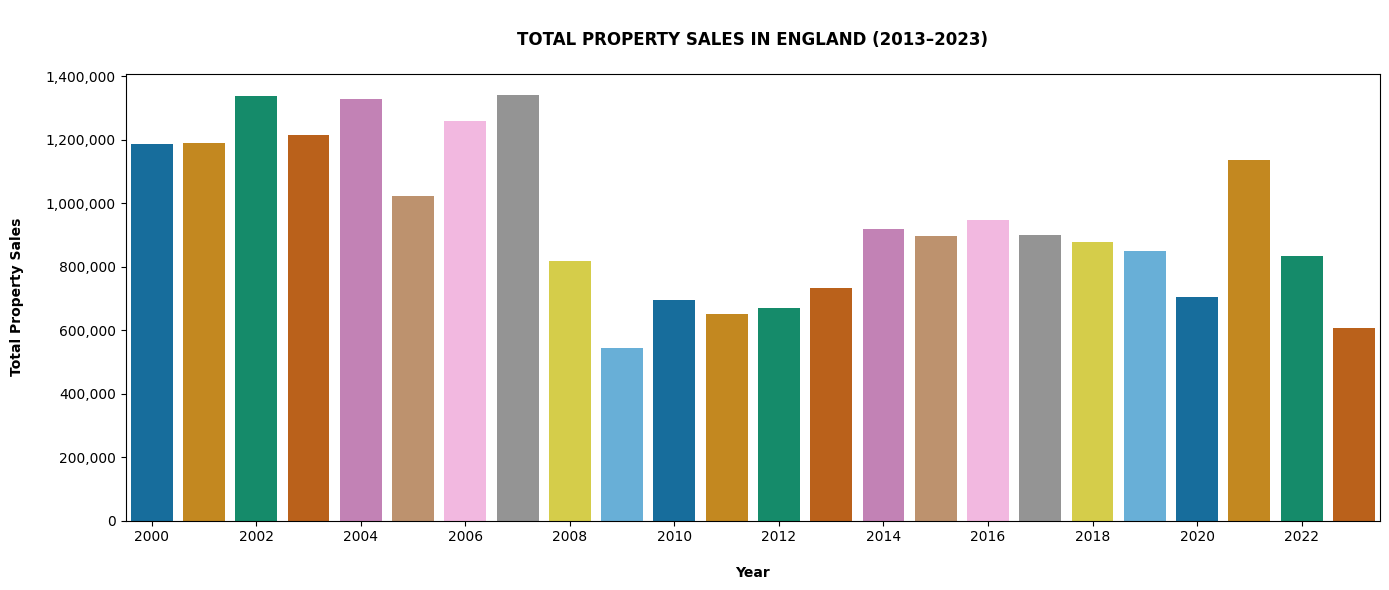

In [ ]:

# 1. Extract the summary row for England total sales
sum_row = Sales_England[Sales_England['DISTRICT'] == 'ENGLAND_TOTAL_SALES']

# 2. Select only year columns (numeric)
year_columns = [col for col in sum_row.columns if col.isnumeric()]

# 3. Extract and flatten the data
year_data = sum_row[year_columns].squeeze()

# 4. Plot
plt.figure(figsize=(14, 6))
sns.barplot(
    x=year_data.index,
    y=year_data.values,
    hue=year_data.index,
    palette='colorblind',
    legend=False  # Prevent warning
)

# 5. Format Y-axis with comma separator (e.g., 1,200,000)
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{int(x):,}'))

# 6. Customize X-axis ticks (every 2 years)
plt.xticks(ticks=np.arange(0, len(year_data), 2), labels=year_data.index[::2])

# 7. Add axis labels and title
plt.xlabel("\nYear", fontweight='bold')
plt.ylabel("Total Property Sales\n", fontweight='bold')
plt.title("\nTOTAL PROPERTY SALES IN ENGLAND (2013–2023)\n", fontweight='bold')

# 8. Finalize
plt.tight_layout()
plt.show()


**MARKDOWN-NON-SPATIAL-VISUALISATION**

Who is my audience?
Data source and data explanation. Cite.




You should use markdown cells to
explain and justify the steps taken in the code


You should also present two final visualisations to communicate your ‘public good’ insight, one spatial and one
non-spatial. For both these visualisations you must indicate your intended audience (e.g. academic, the public,
policymakers, business stakeholders) and the subsequent data visualisation choices that have been made to
ensure these outputs are suitable for this audience.


## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5990">[2]</a>GEOG5990M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>

In [ ]:
import geopandas as gpd

!pip install folium matplotlib mapclassify


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.6 MB/s eta 0:00:00


In [ ]:
National_Parks=gpd.read_file('https://github.com/ClaudiaTurner/GEOG5990M_Project/raw/refs/heads/main/Data_Assignment_2/National_Parks_England_-4082557758695841082/National_Parks_(England)___Natural_England.shp')


# Convert to GeoJSON

National_Parks.to_file("National_Parks.gjson", driver="GeoJSON")

National_Parks = gpd.read_file("National_Parks.gjson")


In [ ]:
print(National_Parks.crs)
print(National_Parks.info)

EPSG:27700
<bound method DataFrame.info of    CODE              NAME  MEASURE DESIG_DATE  \
0     5        NEW FOREST    567.0 2006-04-01   
1     3            EXMOOR    693.0 1954-10-19   
2     2          DARTMOOR    956.0 1951-10-30   
3     8     PEAK DISTRICT   1438.0 1951-04-17   
4     7  NORTH YORK MOORS   1441.0 1952-11-28   
5     4     LAKE DISTRICT   2362.0 1951-08-13   
6     1        THE BROADS    302.0 1989-04-01   
7    10       SOUTH DOWNS   1653.0 2010-03-31   
8     6    NORTHUMBERLAND   1051.0 1957-04-17   
9     9   YORKSHIRE DALES   2185.0 1954-11-16   

                                         HOTLINK      STATUS  \
0                http://www.newforestnpa.gov.uk/  Designated   
1         http://www.exmoor-nationalpark.gov.uk/  Designated   
2                   https://www.dartmoor.gov.uk/  Designated   
3                http://www.peakdistrict.gov.uk/  Designated   
4              http://www.northyorkmoors.org.uk/  Designated   
5                http://www.laked

In [43]:
NBN_records=pd.read_csv('/content/drive/MyDrive/Python_Assignment2/records-2025-04-14.csv')
NBN_records.head().T

,0,1,2,3,4
NBN Atlas record ID,fff9f8af-fb04-4723-9b0c-9f91345b700e,fff6c066-c948-4e78-87ce-ff4b8a213fbb,fff43f0c-0199-4eab-924e-637d32b95804,fff42fe9-2b76-4205-b518-63d9a575add3,ffecb43a-c749-4f76-be5d-36378f5497f1
Occurrence ID,35147752,35038750,35891043,35239203,313685
Licence,CC-BY-NC,CC-BY,CC-BY,CC-BY-NC,CC-BY
Rightsholder,The Mammal Society and Biological Records Centre,Biological Records Centre,Biological Records Centre,Biological Records Centre,The Bumblebee Conservation Trust
Scientific name,Erinaceus europaeus,Cheilosia pagana,Eristalis tenax,Eristalis pertinax,Bombus pascuorum
Taxon author,"Linnaeus, 1758","(Meigen, 1822)","(Linnaeus, 1758)","(Scopoli, 1763)","(Scopoli, 1763)"
Name qualifier,NaN,NaN,NaN,NaN,NaN
Common name,Hedgehog,NaN,NaN,NaN,Common Carder Bee
Species ID (TVK),NBNSYS0000005078,NBNSYS0000006993,NBNSYS0000007054,NBNSYS0000007052,NHMSYS0000875576
Taxon Rank,species,species,species,species,species


In [45]:

from shapely.geometry import Point


# 2. Create geometry from Longitude and Latitude
geometry = [
    Point(xy) for xy in zip(NBN_records['Longitude (WGS84)'], NBN_records['Latitude (WGS84)'])
]

# 3. Create GeoDataFrame
NBN_gdf = gpd.GeoDataFrame(NBN_records, geometry=geometry)

# 5. Export to GeoJSON
NBN_gdf.to_file("NBN_records.gjson", driver="GeoJSON")
NBN_records = gpd.read_file("NBN_records.gjson")

/usr/local/lib/python3.11/dist-packages/pyogrio/geopandas.py:662: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  write(


In [ ]:
print(NBN_records.crs)
print(NBN_records.info)

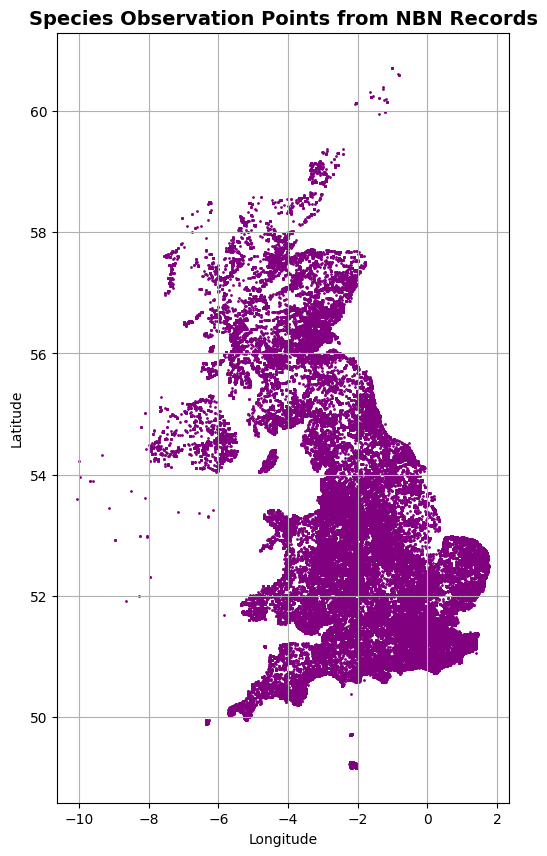

In [50]:
import matplotlib.pyplot as plt

# 2. Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
NBN_records.plot(ax=ax, color='purple', markersize=1)

# 3. Add title and axis
plt.title("Species Observation Points from NBN Records", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()

In [47]:
LAD_Eng=gpd.read_file('/content/drive/MyDrive/Python_Assignment2/Local_Authority_Districts_December_2023_Boundaries_UK_BFE_-2174146030568070774.gpkg')

LAD_Eng.to_file("LAD_eng.gjson", driver="GeoJSON")
LAD_eng= gpd.read_file("LAD_eng.gjson")

In [51]:
print(National_Parks.crs)
print(NBN_records.crs)
print(LAD_eng.crs)

EPSG:27700
EPSG:4326
EPSG:27700


In [52]:
NBN_records = NBN_records.to_crs(epsg=27700)

In [55]:
NBN_records['Class'].value_counts().T

,count
Class,
Insecta,380197
Mammalia,37493
Magnoliopsida,19075
Reptilia,3963
Amphibia,3911
...,...
Cyanophyceae,1
Chytridiomycetes,1
Hydracarina,1


In [58]:
# Keep only rows where Class is 'Mammalia'

# ✅ STEP 1: Filter only records classified as 'Mammalia'
# This narrows down the dataset to include just mammals
mammals_only = NBN_records[NBN_records['Class'] == 'Mammalia']

# ✅ STEP 2: From those mammals, further filter to include only those found in England
# This ensures we're focusing on mammal sightings within the specific region of England
NBN_records = mammals_only[mammals_only['State/Province'] == 'England']

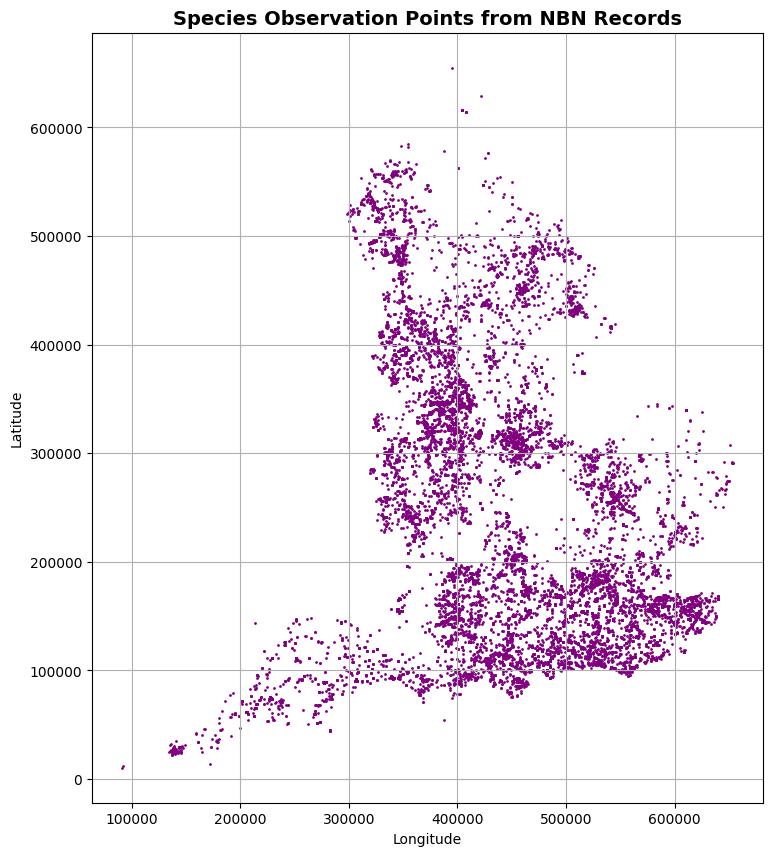

In [59]:

# 2. Plot the points
fig, ax = plt.subplots(figsize=(10, 10))
NBN_records.plot(ax=ax, color='purple', markersize=1)

# 3. Add title and axis
plt.title("Species Observation Points from NBN Records", fontsize=14, fontweight='bold')
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.grid(True)

plt.show()

In [61]:
NBN_records.head().T

,0,44,64,80,88
NBN Atlas record ID,fff9f8af-fb04-4723-9b0c-9f91345b700e,ff8c6ee3-d002-42f9-83b6-d0900684941b,ff5fb31f-665d-4132-8206-9353c8048ad4,ff451153-794a-4273-9601-dd77763a05c1,ff367026-951b-467c-8225-397e446ea341
Occurrence ID,35147752,35240135,35407736,35070994,35274264
Licence,CC-BY-NC,CC0,CC-BY-NC,CC-BY-NC,CC-BY
Rightsholder,The Mammal Society and Biological Records Centre,The Mammal Society and Biological Records Centre,The Mammal Society and Biological Records Centre,The Mammal Society and Biological Records Centre,"The Mammal Society, and Biological Records Centre"
Scientific name,Erinaceus europaeus,Talpa europaea,Vulpes vulpes,Erinaceus europaeus,Arvicola amphibius
Taxon author,"Linnaeus, 1758","Linnaeus, 1758","(Linnaeus, 1758)","Linnaeus, 1758","(Linnaeus, 1758)"
Name qualifier,None,None,None,None,None
Common name,Hedgehog,Mole,Red Fox,Hedgehog,Water Vole
Species ID (TVK),NBNSYS0000005078,NBNSYS0000005079,NHMSYS0000080188,NBNSYS0000005078,NHMSYS0020546253
Taxon Rank,species,species,species,species,species


In [ ]:
Common name